# FRONTEND - BID CURVE

In [1]:
import streamlit as st
import altair as alt
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line

In [2]:
unit = 'PALOS1'
unit_path = './Data_Output/'

In [6]:
df_curve = pd.read_csv(unit_path + unit + '_DataFrame.csv',index_col=0)
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Marg_Price,NG_Price
0,394.1,2019,11,1,1,12,180.30,394.1,2019-11-01,Friday,394.1,42.10,2.54
1,394.1,2019,11,1,2,12,180.30,394.1,2019-11-01,Friday,394.1,40.18,2.54
2,394.1,2019,11,1,3,1,1.13,50.0,2019-11-01,Friday,50.0,32.40,2.54
3,394.1,2019,11,1,3,12,180.30,344.1,2019-11-01,Friday,394.1,32.40,2.54
4,394.1,2019,11,1,4,1,1.13,60.0,2019-11-01,Friday,60.0,30.01,2.54


In [8]:
df_curve_time = df_curve.copy()

df_curve_time.rename(columns={"Period": "Hour"}, inplace = True)
df_curve_time['Date_Hour'] = pd.to_datetime(df_curve_time[['Year', 'Month', 'Day', 'Hour']])

In [9]:
df_curve_time.head()

,Pot_max,Year,Month,Day,Hour,Block,Price,Energy,Date,Weekday,Energy_tot,Marg_Price,NG_Price,Date_Hour
0,394.1,2019,11,1,1,12,180.30,394.1,2019-11-01,Friday,394.1,42.10,2.54,2019-11-01 01:00:00
1,394.1,2019,11,1,2,12,180.30,394.1,2019-11-01,Friday,394.1,40.18,2.54,2019-11-01 02:00:00
2,394.1,2019,11,1,3,1,1.13,50.0,2019-11-01,Friday,50.0,32.40,2.54,2019-11-01 03:00:00
3,394.1,2019,11,1,3,12,180.30,344.1,2019-11-01,Friday,394.1,32.40,2.54,2019-11-01 03:00:00
4,394.1,2019,11,1,4,1,1.13,60.0,2019-11-01,Friday,60.0,30.01,2.54,2019-11-01 04:00:00


In [26]:
%%writefile TFM_frontend_BidCurve.py

import streamlit as st
import altair as alt
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line


st.write('# UNIT BID COMPARISON')

@st.cache
def get_cars():
    time.sleep(3)
    return data.cars()

@st.cache
def get_subset(origin, df):
    time.sleep(5)
    return df[df['Origin']== origin]

unit_path = './Data_Output/'

unit = st.selectbox('SELECT A UNIT', ['PALOS1', 'PALOS2'])
year = st.selectbox('SELECT A YEAR', [2019, 2020])
month = st.selectbox('SELECT A MONTH', [i for i in range(1, 13)])
day = st.selectbox('SELECT A DAY', [i for i in range(1, 32)])
hour = st.selectbox('SELECT AN HOUR', [i for i in range(1, 25)])

date = str(year) + '-' + str(month) + '-' + str(day)

#df_curve = st.file_uploader("/home/dsc/Repos/TFM/PALOS1_DataFrame.csv", type="csv")

df_curve = pd.read_csv(unit_path + unit + '_DataFrame.csv',index_col=0)
df_curve['Date'] = df_curve['Date'].astype('datetime64[ns]')

#plot_bid_curve(df_curve, date, int(hour))

df_plot = df_curve[(df_curve['Date'] == date) & (df_curve['Period'] == hour)]

#my_chart = alt.Chart(df_plot).mark_point().encode(x='Energy_tot', y='Price', color='Block').interactive()

my_chart = alt.Chart(df_plot).mark_line(interpolate='step-before').encode(
                x='Energy_tot:Q', 
                y='Price:Q',
                tooltip='Block'
                ).interactive()

st.altair_chart(my_chart)

#st.write('gracias por visitarme, %s' % name)

Overwriting TFM_frontend_BidCurve.py


In [56]:
%%writefile TFM_FRONTEND_BidCurve_Units.py

import streamlit as st
import altair as alt
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line


st.write('# UNIT BID CURVE')

@st.cache
def get_cars():
    time.sleep(3)
    return data.cars()

@st.cache
def get_subset(origin, df):
    time.sleep(5)
    return df[df['Origin']== origin]

unit_path = './Data_Output/'

unit_type_list = ['COMBINED CYCLE', 'HYDRAULIC']

unit_list = ['PALOS1',
             'PALOS2',
             'PALOS3',
             'SAGUNTO1',
             'ARCOS1',
             'COLON4',
             'ESCATRON3',
             'ALGECIRAS3',
             'CASTELNOU']

unit_hyd_list = ['AGUAYO_GEN',
                 'TAJOENCANT',
                 'MORALETS',
                 'MUELA']

unit_type = st.selectbox('SELECT THE UNIT TECHNOLOGY', unit_type_list)


if unit_type == 'COMBINED CYCLE':
    unit = st.selectbox('SELECT A UNIT', unit_list)
else:
    unit = st.selectbox('SELECT A UNIT', unit_hyd_list)
    
df_unit = pd.read_csv(unit_path + unit + '_DataFrame.csv',index_col=0)
    
year_list = df_unit['Year'].unique()
year = st.selectbox('SELECT A YEAR', year_list)
    
month_list = df_unit[df_unit['Year']==year]['Month'].unique()
month = st.selectbox('SELECT A MONTH', month_list)
    
day_list = df_unit[(df_unit['Year']==year) & 
                    (df_unit['Month']==month)]['Day'].unique()
day = st.selectbox('SELECT A DAY', day_list)
    
hour_list = df_unit[(df_unit['Year']==year) & 
                     (df_unit['Month']==month) & 
                     (df_unit['Day']==day)]['Period'].unique()
hour = st.selectbox('SELECT AN HOUR', hour_list)

    
date = str(year) + '-' + str(month) + '-' + str(day)

#df_curve = st.file_uploader("/home/dsc/Repos/TFM/PALOS1_DataFrame.csv", type="csv")
df_unit['Date'] = df_unit['Date'].astype('datetime64[ns]')

#plot_bid_curve(df_curve, date, int(hour))
df_plot = df_unit[(df_unit['Date'] == date) & (df_unit['Period'] == hour)]

#my_chart = alt.Chart(df_plot).mark_point().encode(x='Energy_tot', y='Price', color='Block').interactive()
#my_chart = alt.Chart(df_plot).mark_line(interpolate='step-before').encode(x='Energy_tot:Q', y='Price:Q',tooltip='Block').interactive()

my_chart = alt.Chart(df_plot).mark_line(interpolate='step-before').encode(
            x='Energy_tot:Q', 
            y='Price:Q',
            tooltip='Block'
            ).interactive()

st.altair_chart(my_chart)

#st.write('gracias por visitarme, %s' % name)

Overwriting TFM_FRONTEND_BidCurve_Units.py


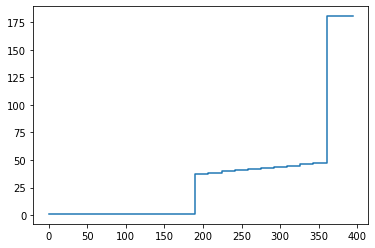

In [44]:
date = '2020-02-01'
hour = int('20')

plot_bid_curve(df_curve, date, hour)

In [45]:
df_curve = pd.read_csv(unit_path + unit + '_DataFrame.csv',index_col=0)
df_curve['Date'] = df_curve['Date'].astype('datetime64[ns]')

#plot_bid_curve(df_curve, date, int(hour))

df_plot = df_curve[(df_curve['Date'] == date) & (df_curve['Period'] == hour)]
df_plot2 = df_curve[(df_curve['Date'] == date)]

In [46]:
df_plot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,Marg_Price,NG_Price
16725,394.1,2020,2,1,20,1,1.13,190.0,2020-02-01,Saturday,190.0,39.63,1.91
16726,394.1,2020,2,1,20,2,37.53,17.0,2020-02-01,Saturday,207.0,39.63,1.91
16727,394.1,2020,2,1,20,3,38.59,17.0,2020-02-01,Saturday,224.0,39.63,1.91
16728,394.1,2020,2,1,20,4,39.66,17.0,2020-02-01,Saturday,241.0,39.63,1.91
16729,394.1,2020,2,1,20,5,40.72,17.0,2020-02-01,Saturday,258.0,39.63,1.91
16730,394.1,2020,2,1,20,6,41.78,17.0,2020-02-01,Saturday,275.0,39.63,1.91
16731,394.1,2020,2,1,20,7,42.84,17.0,2020-02-01,Saturday,292.0,39.63,1.91
16732,394.1,2020,2,1,20,8,43.91,17.0,2020-02-01,Saturday,309.0,39.63,1.91
16733,394.1,2020,2,1,20,9,44.97,17.0,2020-02-01,Saturday,326.0,39.63,1.91
16734,394.1,2020,2,1,20,10,46.03,17.0,2020-02-01,Saturday,343.0,39.63,1.91


In [47]:
alt.Chart(df_plot).mark_line(interpolate='step-before').encode(
    x='Energy_tot:Q', 
    y='Price:Q'
)



alt.Chart(...)

In [48]:
alt.Chart(df_plot).mark_area(interpolate='step-before',color="lightblue",line=True).encode(
    x='Energy_tot:Q', 
    y='Price:Q')

alt.Chart(...)

In [49]:
alt.Chart(df_plot).mark_line(interpolate='step-before').encode(
    x=alt.X('Energy_tot:Q', scale=alt.Scale(domain=[0, 400])),
    y=alt.Y('Price:Q', scale=alt.Scale(domain=[0, 200]))
)

alt.Chart(...)

In [54]:
alt.Chart(df_plot2).mark_line(interpolate='step-before').encode(
    x='Energy_tot:Q', 
    y='Price:Q',
    tooltip='Block'
).interactive()

alt.Chart(...)

In [21]:
alt.Chart(df_plot).mark_line().encode(x='Energy_tot:Q', y='Price:Q') + \
alt.Chart(df_plot).mark_point().encode(x='Energy_tot:Q', y='Price:Q')

alt.LayerChart(...)

In [22]:
alt.Chart(df_plot2).mark_point().encode(
    x='Energy_tot', 
    y='Price',
    color='Block',
    tooltip='Block'
).properties(
    width=500,
    height=200)

alt.Chart(...)

In [23]:
df_sample = df_curve_time.loc[:4999]
df_sample.shape

(5000, 14)

In [24]:
df_sample.columns

Index(['Pot_max', 'Year', 'Month', 'Day', 'Hour', 'Block', 'Price', 'Energy',
       'Date', 'Weekday', 'Energy_tot', 'Marg_Price', 'NG_Price', 'Date_Hour'],
      dtype='object')

In [116]:
# UN BUEN PLOT PUEDE SALIR DE AQUÍ SI SE TOMA EL DF COMPLETO 24h-DAYS Y SE ELIMINAN EL block_max
#(para eliminar de la media los valores máximos de 180.3€ y solo dejarlos en los casos en de 
#horas de la noche donde siempre están parados.
#NOTA: LO CIERTO ES QUE QUIZÁS SEA MEJOR ELIMINAR DEL DF LOS VALORES CON 180.3 Y VOLVER A HACER EL PLOT.

In [118]:
df_curve_time_noMax = df_curve_time[df_curve_time['Price']<=180]

(62632, 13)

In [ ]:
#Importante tener esto en cuenta para no hacer demasiado grande el notebook

#alt.data_transformers.enable('default', max_rows=None)

In [161]:
#OJO, QUE NO APARECE LA HORA 2 (PORQUE NO HAY DATOS AL ELIMINAR EL 180.3)

#alt.Chart(df_curve_time_noMax).mark_rect().encode(
    #x=alt.X('hours(Date_Hour):O'),
    #y=alt.Y('month(Date_Hour):O'),
    #color='mean(Price):Q')

In [124]:
#OJO, QUE NO APARECE LA HORA 2 (PORQUE NO HAY DATOS AL ELIMINAR EL 180.3)

#alt.Chart(df_curve_time).mark_rect().encode(
    #x=alt.X('hours(Date_Hour):O'),
    #y=alt.Y('month(Date_Hour):O'),
    #color='mean(Marg_Price):Q')